In [1]:
import pandas as pd
from prophet import Prophet

In [2]:
data = pd.read_csv('농어.csv')
data['ds'] = pd.to_datetime(data['기간'])  # 'ds' 컬럼을 날짜 형식으로 변환
data.rename(columns={'단가': 'y'}, inplace=True)  # 종속 변수 컬럼 이름을 'y'로 변경

In [3]:
model1 = Prophet(seasonality_prior_scale=1)
model1.fit(data)

00:19:24 - cmdstanpy - INFO - Chain [1] start processing
00:19:24 - cmdstanpy - INFO - Chain [1] done processing


In [4]:
future = model1.make_future_dataframe(periods=12, freq='M')  # 향후 12개월의 날짜 생성
forecast = model1.predict(future)

In [5]:
forecast['yhat'] = forecast['yhat'].apply(lambda x: max(0, x))

In [6]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
25,2023-02-28,13077.313823,11606.153688,14625.899993
26,2023-03-31,19849.339311,18352.434239,21423.585611
27,2023-04-30,8823.134444,7276.121182,10194.045052
28,2023-05-31,22332.102378,20737.269258,23713.668639
29,2023-06-30,19731.955581,18250.706279,21247.698120
30,2023-07-31,18435.532344,17006.400668,20009.025620
31,2023-08-31,28606.277798,27221.416597,30136.991830
32,2023-09-30,6002.642242,4488.005084,7503.200326
33,2023-10-31,12094.083358,10574.564601,13527.586729
34,2023-11-30,20848.026151,19226.304516,22373.524222


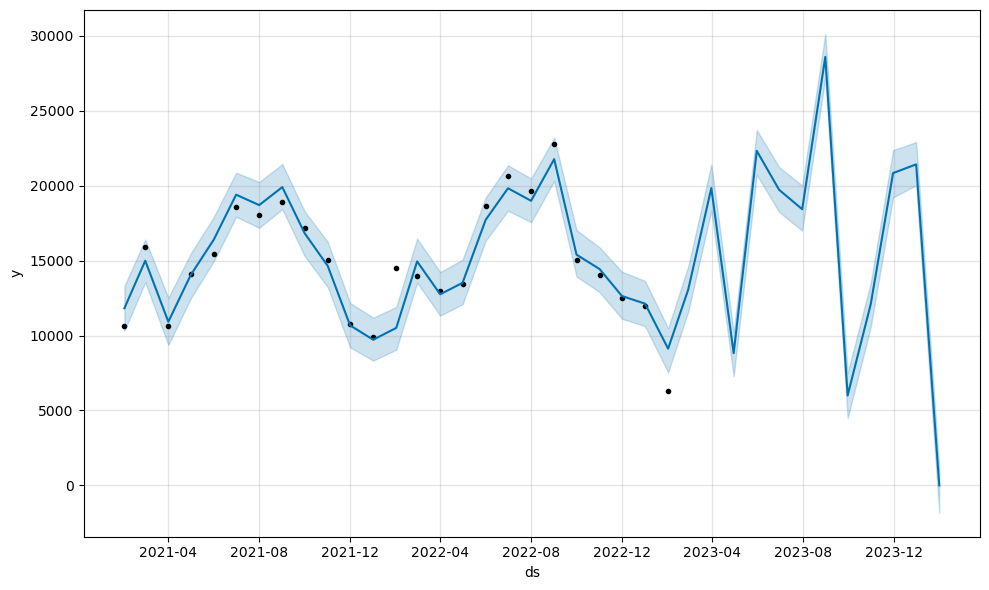

In [7]:
fig1 = model1.plot(forecast)

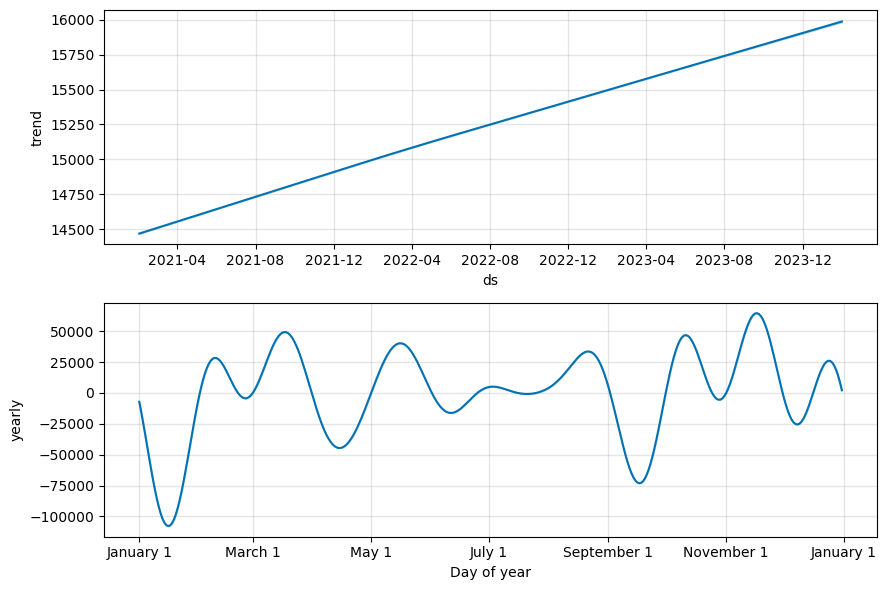

In [8]:
fig2 = model1.plot_components(forecast)

In [8]:
import pandas as pd
from sklearn.linear_model import LinearRegression

In [9]:
data = pd.read_csv('농어.csv')

In [10]:
quantity = data['물량-평균'].values
price = data['단가'].values

In [11]:
model = LinearRegression()
model.fit(quantity.reshape(-1, 1), price)

LinearRegression()

In [12]:
print("물량과 가격 분석 결과:")
print("기울기 (회귀 계수):", model.coef_[0])
print("절편 (절편 값):", model.intercept_)

물량과 가격 분석 결과:
기울기 (회귀 계수): 4.035247743308759
절편 (절편 값): 14278.496284441642


In [13]:
future_quantity = 50 # 예측할 물량
predicted_price = model.predict([[future_quantity]])

In [14]:
print("물량에 따른 예측 가격:")
print("물량:", future_quantity)
print("예측 가격:", predicted_price[0])

물량에 따른 예측 가격:
물량: 50
예측 가격: 14480.25867160708
